In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from numpy import trapz

%matplotlib inline

In [17]:
# Get the required files
df_sig = pd.read_hdf('mc16ae_Honly_sig_NN_var.h5', 'df_sig')
df_bkg2 = pd.read_hdf('mc16a_qZZ_bkg_NN_var.h5','df_bkg2')
#get 1 jet events
df_sig1j = df_sig[df_sig['n_jets']==1]
df_bkg21j = df_bkg2[df_bkg2['n_jets']==1]

In [18]:
#define the log of the ME disc as a new column
df_sig['ME_disc_0j'] = np.log10(df_sig['ggHZZ_ME_0j']/(df_sig['ggZZ_ME_0j']+0.1*df_sig['qqZZ_ME_0j']))
df_bkg2['ME_disc_0j'] = np.log10(df_bkg2['ggHZZ_ME_0j']/(df_bkg2['ggZZ_ME_0j']+0.1*df_bkg2['qqZZ_ME_0j']))
df_sig['label_real'] = 0
df_bkg2['label_real'] = 1
#df_sig['label_cut'] = 0
#df_bkg2['label_cut'] = 1
#df_sig.shape

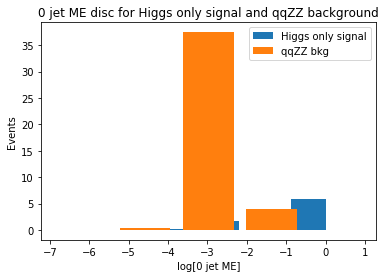

In [19]:
ax = plt.subplot(111)
df_sig['ME_disc_0j'].plot(kind='hist', bins=5, rwidth=0.80,density=False, label='Higgs only signal', weights=df_sig['weight'])
df_bkg2['ME_disc_0j'].plot(kind='hist', bins=5, rwidth=0.80, density=False, label='qqZZ bkg', weights=df_bkg2['weight'])
plt.title('0 jet ME disc for Higgs only signal and qqZZ background')
plt.xlabel('log[0 jet ME]')
plt.ylabel('Events')
ax.legend()
plt.show()

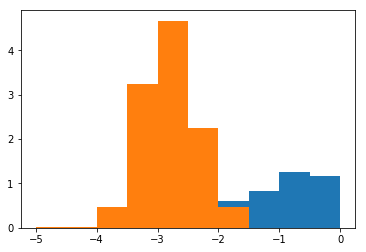

In [6]:
(n_sig, bins_sig, patches_sig) = plt.hist(df_sig['ME_disc_0j'],range=(-5, 0), bins=10, label='hst', weights=df_sig['weight'])
(n_bkg, bins_bkg, patches_bkg) = plt.hist(df_bkg2['ME_disc_0j'], range=(-5, 0), bins=10, label='hst', weights=df_bkg2['weight'])

11.135290020544831


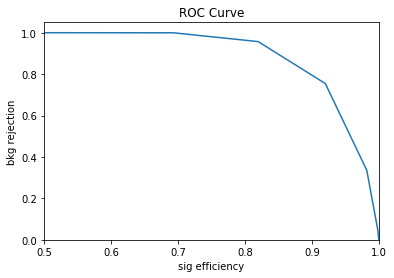

In [15]:
a = np.linspace(-5, 0, 10)
sig_eff_old = []
bkg_rej_old = []
total_sig=0
total_bkg=0
for sig in n_sig:
    total_sig = total_sig+sig
for bkg in n_bkg:
    total_bkg = total_bkg+bkg
print(total_bkg)
for j in a:
    TP=0
    FP =0
    for i in range(0, 10):
        if bins_sig[i]>j:
            TP=TP+n_sig[i]
            FP=FP+n_bkg[i]
    sig_eff_old.append(TP/total_sig)
    bkg_rej_old.append(1 - (FP/total_bkg))
    
plt.figure()
plt.title('ROC Curve')
plt.plot(sig_eff_old, bkg_rej_old)
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.5, 1])
plt.ylim([0, 1.05])
plt.ylabel('bkg rejection')
plt.xlabel('sig efficiency')
plt.show()

In [ ]:
if bins_sig>=j
        TP = TP+
    for i in range(0, 22856):
        if (df['ME_disc_0j'])[i]>j:
            labels.append(0)
            if (df['label_real'][i] == 0):
                TP = TP+1
            else:
                FP = FP+1
        else:
            labels.append(1)
    
    sig_eff_old.append(TP/(df['label_real'] == 0).value_counts())
    bkg_rej_old.append(1 - (FP/(df['label_real'] == 1).value_counts()))
    #print(sig_eff_old)
    #print(bkg_rej_old)

array([-5.        , -4.66666667, -4.33333333, -4.        , -3.66666667,
       -3.33333333, -3.        , -2.66666667, -2.33333333, -2.        ,
       -1.66666667, -1.33333333, -1.        , -0.66666667, -0.33333333,
        0.        ])

In [5]:
df= pd.concat((df_sig, df_bkg2), ignore_index=True)
#df.shape

In [22]:
a = np.linspace(-5.5,0.5,100)
#print(a)
sig_eff_old = []
bkg_rej_old = []
labels=[]
for j in a:
    #print(j)
    TP =0
    FP =0
    for i in range(0, 22856):
        if (df['ME_disc_0j'])[i]>j:
            labels.append(0)
            if (df['label_real'][i] == 0):
                TP = TP+1
            else:
                FP = FP+1
        else:
            labels.append(1)
    
    sig_eff_old.append(TP/(df['label_real'] == 0).value_counts())
    bkg_rej_old.append(1 - (FP/(df['label_real'] == 1).value_counts()))
    #print(sig_eff_old)
    #print(bkg_rej_old)


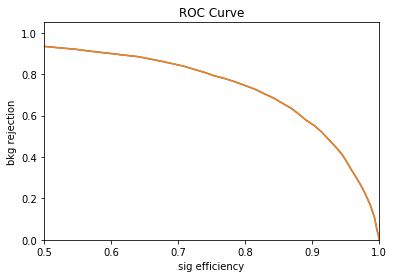

In [23]:
plt.figure()
plt.title('ROC Curve')
plt.plot(sig_eff_old, bkg_rej_old)
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.5, 1])
plt.ylim([0, 1.05])
plt.ylabel('bkg rejection')
plt.xlabel('sig efficiency')
plt.show()
